In [2]:
"""
A1
Writing functions for the following
"""
import math
#function for summation unit
def summation_unit(inputs,weights,bias):
    sum = 0
    for i,w in zip(inputs,weights):
        sum += (i*w)
    return sum + bias
# defining the activation units:
#step function:
def step_function(value:int):
    return 0 if value < 0 else 1
# bipolar step function
def bipolar_step_function(value):
    return -1 if value < 0 else 1

#sigmoid function:
def sigmoid_function(value):
    return 1/(1 + math.exp(-value))

#tanH function
def tanH_function(value):
    return math.tanh(value)

#ReLu function
def ReLu_function(value):
    return value if value > 0 else 0

#leaky ReLu function
def leakyReLu_function(value):
    return value if value > 0 else (0.01 * value)

def error_calculation(actual, predicted):
    return actual - predicted
    


Training with learning rate: 0.1

Training with learning rate: 0.2

Training with learning rate: 0.30000000000000004

Training with learning rate: 0.4

Training with learning rate: 0.5

Training with learning rate: 0.6

Training with learning rate: 0.7000000000000001

Training with learning rate: 0.8

Training with learning rate: 0.9

Training with learning rate: 1.0


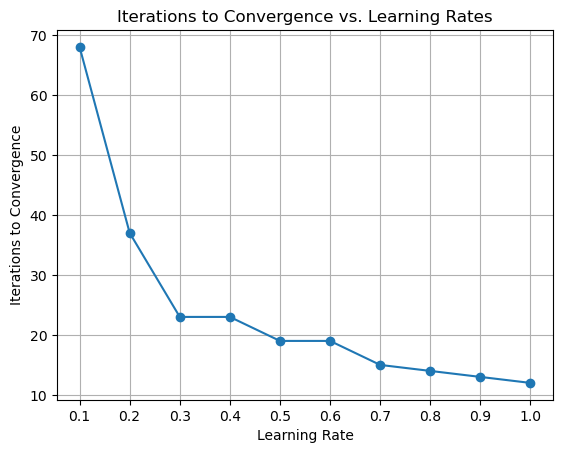

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and corresponding outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias
initial_W = np.array([0.2, -0.75])  # Weights W1 and W2
initial_b = 10                      # Initial bias (W0)

learning_rates = np.arange(0.1, 1.1, 0.1)  # Learning rates from 0.1 to 1.0
iterations_per_lr = []  # To store the number of iterations for each learning rate


def perceptron(X, W, b):
    z = summation_unit(X,W,b)
    return step_function(z)


def train_perceptron(X, y, learning_rate, epochs=150):
    W = initial_W.copy()  # Reset weights for each learning rate
    b = initial_b  # Reset bias for each learning rate
    for epoch in range(epochs):
        converged = True
        for i in range(len(X)):
            prediction = perceptron(X[i], W, b)
            error = y[i] - prediction  # Calculate the error
            
            # Update weights and bias using perceptron learning rule
            W += learning_rate * error * X[i]
            b += learning_rate * error
            
            if error != 0:
                converged = False
        
        # If converged, store the number of iterations and break
        if converged:
            iterations_per_lr.append(epoch + 1)  # Epoch is 0-indexed, so add 1
            break
    else:
        iterations_per_lr.append(epochs)  # If not converged, store the max epochs
    
    return W, b


# Test different learning rates
for lr in learning_rates:
    print(f'\nTraining with learning rate: {lr}')
    W, b = train_perceptron(X, y, lr)

# Plotting the number of iterations against learning rates
plt.plot(learning_rates, iterations_per_lr, marker='o')
plt.title('Iterations to Convergence vs. Learning Rates')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations to Convergence')
plt.xticks(learning_rates)
plt.grid()
plt.show()




Final Predictions:
Input: [0 0], Output: -1
Input: [0 1], Output: -1
Input: [1 0], Output: -1
Input: [1 1], Output: 1


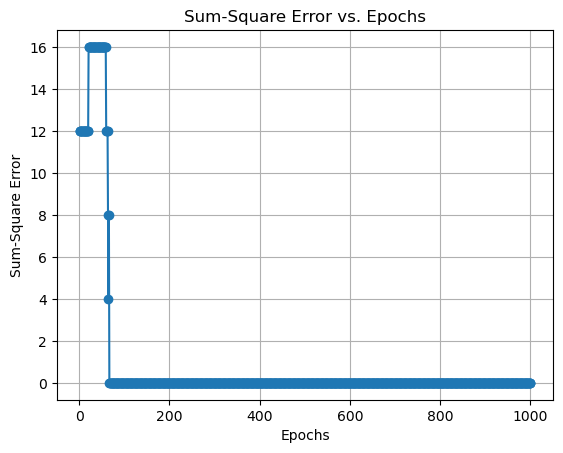

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and corresponding outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y = np.array([-1, -1, -1, 1])  # AND gate outputs

# Initialize weights and bias
W = np.array([0.2, -0.75])  # Weights W1 and W2
b = 10                      # Initial bias (W0)

learning_rate = 0.05        # Learning rate α


# Perceptron model
def perceptron(X, W, b):
    z = summation_unit(X,W,b)  # Summation unit
    return bipolar_step_function(z)

# Training the perceptron
def train_perceptron(X, y, W, b, learning_rate, epochs=1000):
    error_values = []  # List to store sum-square error values
    for epoch in range(epochs):
        for i in range(len(X)):
            prediction = perceptron(X[i], W, b)
            error = y[i] - prediction  # Calculate the error
            
            # Update weights and bias using perceptron learning rule
            W += learning_rate * error * X[i]
            b += learning_rate * error
            
            #print(f'Input: {X[i]}, Prediction: {prediction}, Error: {error}, Updated Weights: {W}, Updated Bias: {b}')

        # Calculate the Sum-Square Error for the epoch
        sse = np.sum((y - np.array([perceptron(x, W, b) for x in X]))**2)
        error_values.append(sse)
    
    return W, b, error_values

# Train the perceptron
W, b, error_values = train_perceptron(X, y, W, b, learning_rate)

# Test the perceptron
print('\nFinal Predictions:')
for i in range(len(X)):
    print(f'Input: {X[i]}, Output: {perceptron(X[i], W, b)}')

# Plotting the error values against epochs
plt.plot(range(1, len(error_values) + 1), error_values, marker='o')
plt.title('Sum-Square Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.grid()
plt.show()


Final Predictions:
Input: [0 0], Output: 1.0
Input: [0 1], Output: 1.0
Input: [1 0], Output: 1.0
Input: [1 1], Output: 1.0


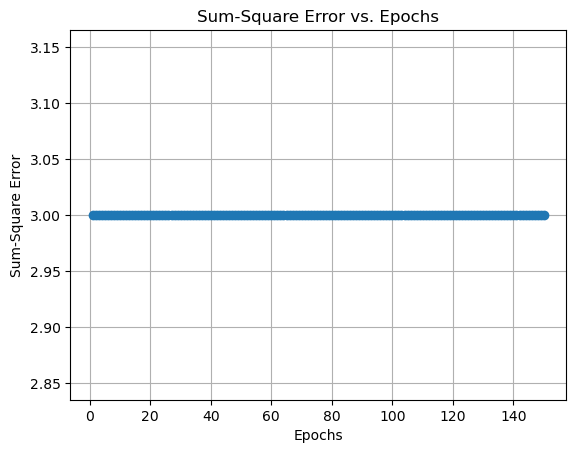

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate inputs and corresponding outputs
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Outputs for the AND gate (using 0 and 1)
y = np.array([0, 0, 0, 1])  # AND gate outputs

# Initialize weights and bias
W = np.array([0.2, -0.75])  # Weights W1 and W2
b = 10                      # Initial bias (W0)

learning_rate = 0.05        # Learning rate α

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

def sigmoid_function(value):
    return 1/(1 + np.exp(-value))


# Perceptron model
def perceptron(X, W, b):
    z = summation_unit(X,W,b)  # Summation unit
    return sigmoid_function(z)

# Training the perceptron
def train_perceptron(X, y, W, b, learning_rate, epochs=150):
    error_values = []  # List to store sum-square error values
    for epoch in range(epochs):
        for i in range(len(X)):
            # Get prediction using the sigmoid function
            prediction = perceptron(X[i], W, b)
            error = y[i] - prediction  # Calculate the error
            
            # Update weights and bias using perceptron learning rule
            W += learning_rate * error * sigmoid_derivative(prediction) * X[i]
            b += learning_rate * error * sigmoid_derivative(prediction)
            
        # Calculate the Sum-Square Error for the epoch
        predictions = np.array([perceptron(X[i], W, b) for i in range(len(X))])
        sse = np.sum((y - np.round(predictions))**2)
        error_values.append(sse)
    
    return W, b, error_values

# Train the perceptron
W, b, error_values = train_perceptron(X, y, W, b, learning_rate)

# Test the perceptron
print('\nFinal Predictions:')
for i in range(len(X)):
    print(f'Input: {X[i]}, Output: {np.round(perceptron(X[i], W, b))}')

# Plotting the error values against epochs
plt.plot(range(1, len(error_values) + 1), error_values, marker='o')
plt.title('Sum-Square Error vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Sum-Square Error')
plt.grid()
plt.show()